<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Machine_Learning_for_Predicting_Future_Stock_Price_and_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.4 MB/s eta 0:00:00


In [20]:
import yfinance as yf
import plotly.graph_objects as go

# Step 1: Loading Financial Data
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2022-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Create Candlestick Plot
fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low=stock_data['Low'],
                                     close=stock_data['Close'])])

fig.update_layout(title=f'{ticker} Candlestick Chart',
                 xaxis_title='Date',
                 yaxis_title='Price')

fig.show()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0699
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0049
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0015
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0011
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0011
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 9.1425e-04
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0010
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 9.4253e-04
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0011
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 8.5672e-04
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 8.3936e-04
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 8.6092e-04
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 9.6343e-04
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.9770e-04
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - 

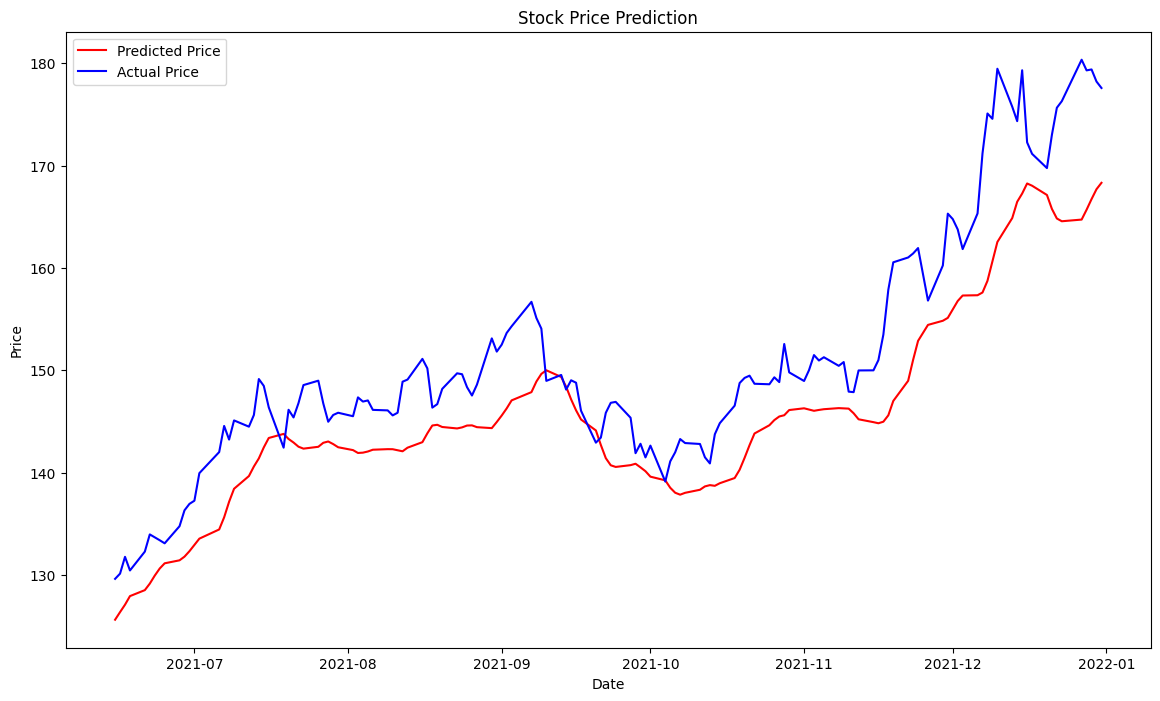

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Step 1: Loading Financial Data
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2022-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preparing Data
data = stock_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_dataset(scaled_data, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Neural Network Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 4: Testing The Model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Step 5: Visualizing Predictions
plt.figure(figsize=(14, 8))
plt.plot(stock_data.index[-len(predicted_stock_price):], predicted_stock_price, color='red', label='Predicted Price')
plt.plot(stock_data.index[-len(predicted_stock_price):], stock_data['Close'][-len(predicted_stock_price):], color='blue', label='Actual Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [19]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Step 1: Loading Financial Data
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2022-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preparing Data
data = stock_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_dataset(scaled_data, time_steps)

# Reshape X for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 3: Neural Network Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=50, batch_size=32)

# Step 4: Price Prediction for Future Time Steps
future_time_steps = 30
future_data = scaled_data[-time_steps:]
future_X = future_data[-time_steps:].reshape(1, time_steps, 1)
future_predictions = []

for i in range(future_time_steps):
    prediction = model.predict(future_X)
    future_predictions.append(prediction[0, 0])
    future_X = np.append(future_X, prediction.reshape(1, 1, 1), axis=1)
    future_X = future_X[:, 1:, :]

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)
print("Future Stock Price Predictions:")
print(future_predictions)

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1621
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0087
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0016
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.5396e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.4046e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 9.3307e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 8.9891e-04
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.9063e-04
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 9.3269e-04
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 9.8702e-04
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 8.4371e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.4204e-04
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 8.4944e-04
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 7.9740e-04
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━

In [24]:
!pip install tensorflow

In [23]:
!pip install keras

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 0.0320
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0017
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0014
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0014
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0014
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0014
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 9.5430e-04
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.0013
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 9.6354e-04
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0011
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0011
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0011
Epoch 13/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 9.6890e-04
Epoch 14/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 9.7526e-04
Epoch 15/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 85

[*********************100%%**********************]  1 of 1 completed


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


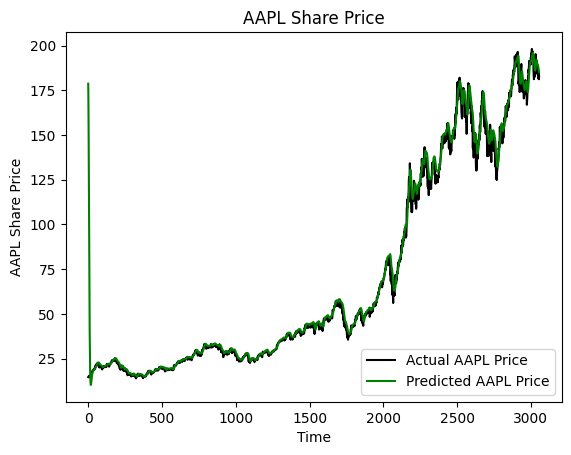

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
Prediction: [[184.7492]]


In [29]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential  # Corrected import statement
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error




# Step 1: Loading Financial Data
ticker = 'AAPL'
start_date = '2012-01-01'
end_date = '2022-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Prepare dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

prediction_days = 60


x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


''' Test the Model Acuracy on Existing Data '''

# Load Test Data
test_start = '2012-01-01'
test_end = '2024-02-28'

test_data = yf.download(ticker, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((stock_data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


# Plot Prediction
plt.plot(actual_prices, color='black', label=f'Actual {ticker} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {ticker} Price')
plt.title(f'{ticker} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{ticker} Share Price')
plt.legend()
plt.show()


# Predict Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f'Prediction: {prediction}')



